# Convolutional Neural Network for DRUJ with reduced resolution


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout
from keras.models import model_from_json

## Load data

I previously created a file with the combined data at reduced resolution.

In [2]:
ComboReduce = np.asarray(pd.read_csv('ComboReduce.csv', header = None))

In [3]:
print(ComboReduce.shape)

(150000, 1050)


In [4]:
print(type(ComboReduce))

<class 'numpy.ndarray'>


In [5]:
ComboReduce = np.reshape(ComboReduce, (300, 500, 1050, 1))

Look at the combination view to make sure it is as expected. 

<function matplotlib.pyplot.show(close=None, block=None)>

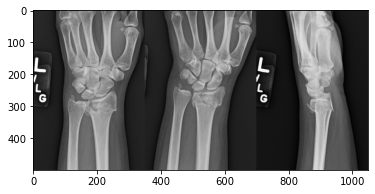

In [6]:
img = ComboReduce[0,:,:,0] 
plt.imshow(img, cmap='gray')  
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

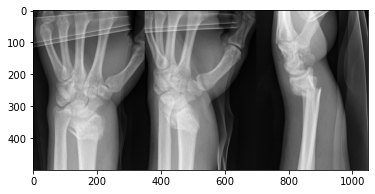

In [7]:
img = ComboReduce[276,:,:,0] 
plt.imshow(img, cmap='gray')  
plt.show

### Data Normalization

In [8]:
ComboReduce = ComboReduce/255.0

## Convolutional Neural Network

Load labels

In [9]:
DRUJLabels = np.asarray(pd.read_csv('DRUJLabels.csv', header = None))
DRUJLabels.shape

(300, 3)

### Divide the data into a training set and test set

In [10]:
check = list(range(0,300,1))
split = np.asarray(random.sample(check, 60))

In [11]:
ComboTest = ComboReduce[split,:,:,:]
yTest = DRUJLabels[split,:]

In [12]:
ComboTrain = np.delete(ComboReduce, split, axis=0)
yTrain = np.delete(DRUJLabels, split, axis=0)

In [13]:
print("ComboTest shape = ", ComboTest.shape, "yTest shape = ", yTest.shape)
print("ComboTrain shape = ", ComboTrain.shape, "yTrain shape = ", yTrain.shape)

ComboTest shape =  (60, 500, 1050, 1) yTest shape =  (60, 3)
ComboTrain shape =  (240, 500, 1050, 1) yTrain shape =  (240, 3)


### Build the model

Create the model and add some sample layers. 

In [14]:
model = Sequential()
model.add(Conv2D(128, kernel_size=5, activation='relu', input_shape=(500,1050,1)))
model.add(Conv2D(64, kernel_size=5, activation='relu'))
model.add(Conv2D(32, kernel_size=5, activation='relu'))
model.add(Conv2D(16, kernel_size=5, activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

Compile the model. Use accuracy to measure model performance

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the model with 20 epochs.

In [16]:
model.fit(ComboTrain, yTrain, validation_data=(ComboTest, yTest), epochs=40)

Epoch 1/40
8/8 [==============================] - 929s 116s/step - loss: 30.9966 - accuracy: 0.4625 - val_loss: 1.0858 - val_accuracy: 0.1667
Epoch 2/40
8/8 [==============================] - 921s 115s/step - loss: 1.1209 - accuracy: 0.7583 - val_loss: 1.0488 - val_accuracy: 0.7833
Epoch 3/40
8/8 [==============================] - 919s 114s/step - loss: 1.0804 - accuracy: 0.7833 - val_loss: 1.0875 - val_accuracy: 0.7500
Epoch 4/40
8/8 [==============================] - 919s 115s/step - loss: 1.0821 - accuracy: 0.7750 - val_loss: 1.0692 - val_accuracy: 0.7833
Epoch 5/40
8/8 [==============================] - 917s 114s/step - loss: 1.2793 - accuracy: 0.7958 - val_loss: 1.0634 - val_accuracy: 0.7833
Epoch 6/40
8/8 [==============================] - 917s 114s/step - loss: 1.0560 - accuracy: 0.7958 - val_loss: 1.0654 - val_accuracy: 0.7667
Epoch 7/40
8/8 [==============================] - 918s 114s/step - loss: 1.7195 - accuracy: 0.7417 - val_loss: 1.0206 - val_accuracy: 0.7667
Epoch 8/40
8

In [17]:
predict_x=model.predict(ComboTest) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)
print(predict_x)

[0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1]
[[6.78522408e-01 3.21477562e-01 1.10149955e-19]
 [1.39160857e-05 9.99986053e-01 1.04873224e-15]
 [1.74329602e-04 9.99825656e-01 1.92634516e-17]
 [5.39519871e-03 9.94604766e-01 2.79982615e-08]
 [8.52227515e-07 9.99999166e-01 3.53667792e-20]
 [4.90462233e-04 9.99509573e-01 1.37290856e-09]
 [5.76803687e-13 1.00000000e+00 5.14280241e-26]
 [1.56303762e-10 1.00000000e+00 2.81298406e-20]
 [1.40873291e-09 1.00000000e+00 2.16897976e-24]
 [9.71304357e-01 2.86956802e-02 1.90046290e-08]
 [9.77722526e-01 2.22774912e-02 3.02744638e-08]
 [7.77500987e-01 2.22499058e-01 2.78412871e-09]
 [1.32781213e-06 9.99998689e-01 3.03862747e-17]
 [5.35249105e-03 9.94647443e-01 1.56255425e-11]
 [6.04970555e-05 9.99939442e-01 4.80677486e-16]
 [1.21122330e-01 8.78877699e-01 6.08019624e-12]
 [9.93417740e-01 6.58223126e-03 1.36822472e-11]
 [1.78330974e-03 9.98216689e-01 6.29028043e-21]
 [2.48256139e

In [18]:
print(yTest)

[[0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]]


In [19]:
print(split)

[134 207  61  60 275 117  53  67 138 100 241 110 239 149  82 151  64  31
  22  80 162 255 283 198  20 106 158 159 249  87  69 107  28 170 121  32
  24 205 208 218 271 128  79  58  34 247 137 150 167  45  62   4 235  55
 242 280   9   8   5 204]


In [20]:
from sklearn.metrics import multilabel_confusion_matrix

In [21]:
DRUJLabels02 = np.asarray(pd.read_csv('DRUJLabels03.csv', header = None))
DRUJLabelsTest = DRUJLabels02[split]

In [22]:
print(DRUJLabelsTest)

[[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [2]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [0]
 [1]]


In [23]:
multilabel_confusion_matrix(DRUJLabelsTest, classes_x)

array([[[44,  6],
        [ 7,  3]],

       [[ 4,  9],
        [ 6, 41]],

       [[57,  0],
        [ 2,  1]]], dtype=int64)

In [24]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))